In [23]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
#read_csv() is a pandas function to read csv files
data = pd.read_csv("german_credit_data.csv")

In [25]:
#head() method is used to return top n (5 by default) rows of a DataFrame or series
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [26]:
data.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   818 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [28]:
data.isnull().any()

Age                 False
Sex                 False
Job                 False
Housing             False
Saving accounts      True
Checking account     True
Credit amount       False
Duration            False
Purpose             False
Risk                False
dtype: bool

In [29]:
data.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     182
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

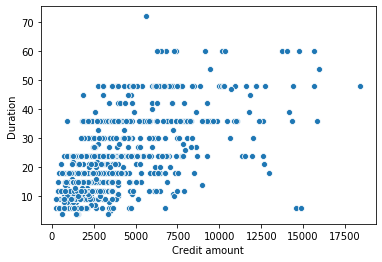

In [30]:
sns.scatterplot(x="Credit amount",y="Duration",data = data)

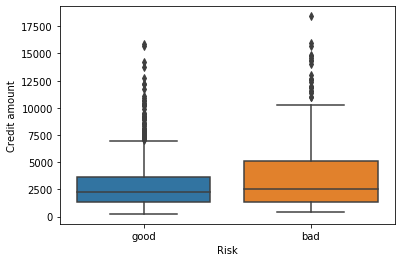

In [31]:
sns.boxplot(x="Risk",y="Credit amount",data = data)

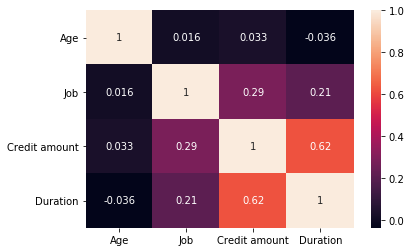

In [32]:
sns.heatmap(data.corr(), annot=True)

In [33]:
data["Checking account"].fillna(data["Checking account"].mode()[0] , inplace =True)
data["Saving accounts"].fillna(data["Saving accounts"].mode()[0] , inplace =True)

In [34]:
data.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [35]:
data.corr()

,Age,Job,Credit amount,Duration
Age,1.000000,0.015673,0.032716,-0.036136
Job,0.015673,1.000000,0.285385,0.210910
Credit amount,0.032716,0.285385,1.000000,0.624984
Duration,-0.036136,0.210910,0.624984,1.000000


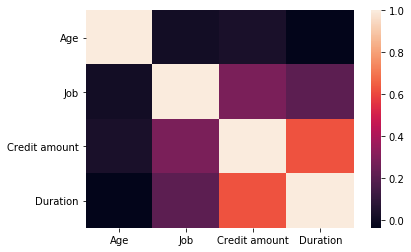

In [36]:
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values )

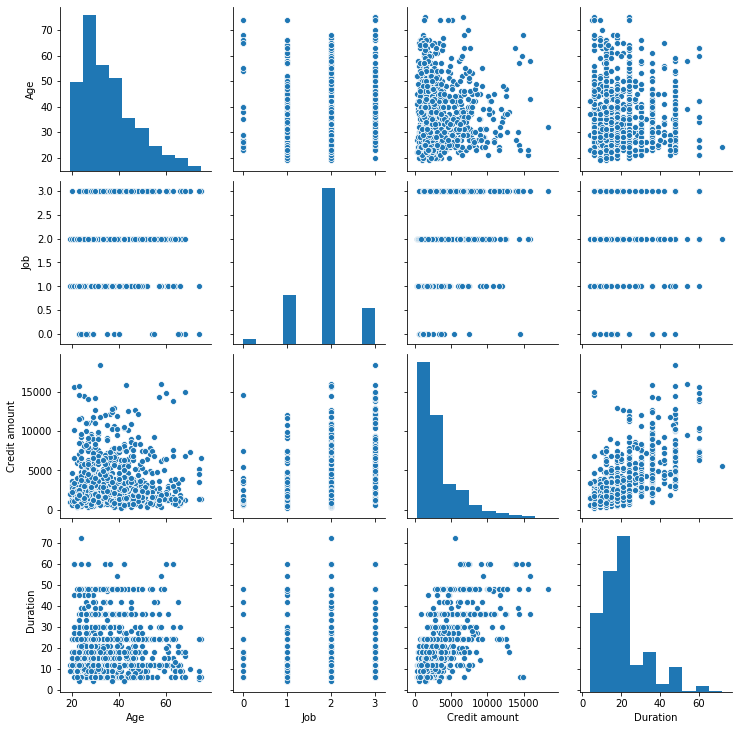

In [37]:
sns.pairplot(data=data, palette="inferno")

In [38]:
data.drop(["Age"], axis = 1, inplace = True)

In [39]:
data

,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,male,2,own,little,little,1169,6,radio/TV,good
1,female,2,own,little,moderate,5951,48,radio/TV,bad
2,male,1,own,little,little,2096,12,education,good
3,male,2,free,little,little,7882,42,furniture/equipment,good
4,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...
995,female,1,own,little,little,1736,12,furniture/equipment,good
996,male,3,own,little,little,3857,30,car,good
997,male,2,own,little,little,804,12,radio/TV,good
998,male,2,free,little,little,1845,45,radio/TV,bad


In [40]:
data["Housing"].unique()

array(['own', 'free', 'rent'], dtype=object)

In [41]:
data["Saving accounts"].unique()

array(['little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [42]:
data["Job"].unique()

array([2, 1, 3, 0], dtype=int64)

In [44]:
data["Checking account"].unique()

array(['little', 'moderate', 'rich'], dtype=object)

In [43]:
data["Purpose"].unique()

array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object)

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Sex"] = le.fit_transform(data["Sex"])
#data["Housing"] = le.fit_transform(data["Housing"])
#data["Checking account"] = le.fit_transform(data["Checking account"])
#data["Purpose"] = le.fit_transform(data["Purpose"])
data["Risk"] = le.fit_transform(data["Risk"])
#data["Saving accounts"] = le.fit_transform(data["Saving accounts"])

In [46]:
data

,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,1,2,own,little,little,1169,6,radio/TV,1
1,0,2,own,little,moderate,5951,48,radio/TV,0
2,1,1,own,little,little,2096,12,education,1
3,1,2,free,little,little,7882,42,furniture/equipment,1
4,1,2,free,little,little,4870,24,car,0
...,...,...,...,...,...,...,...,...,...
995,0,1,own,little,little,1736,12,furniture/equipment,1
996,1,3,own,little,little,3857,30,car,1
997,1,2,own,little,little,804,12,radio/TV,1
998,1,2,free,little,little,1845,45,radio/TV,0


In [47]:
data.columns

Index(['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [51]:
#Dependent Variables
x=data.iloc[:,[0,1,2,3,4,5,6,7]]
x

,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,1,2,own,little,little,1169,6,radio/TV
1,0,2,own,little,moderate,5951,48,radio/TV
2,1,1,own,little,little,2096,12,education
3,1,2,free,little,little,7882,42,furniture/equipment
4,1,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...
995,0,1,own,little,little,1736,12,furniture/equipment
996,1,3,own,little,little,3857,30,car
997,1,2,own,little,little,804,12,radio/TV
998,1,2,free,little,little,1845,45,radio/TV


In [56]:
#Dependent Variables
y=data.iloc[:,8]
y=pd.DataFrame(y,columns=['Risk'])
y

,Risk
0,1
1,0
2,1
3,1
4,0
...,...
995,1
996,1
997,1
998,0


In [57]:
x.shape

(1000, 8)

In [58]:
y.shape

(1000, 1)

In [59]:
from collections import Counter
Counter(data["Risk"])

Counter({1: 700, 0: 300})

In [60]:
from collections import Counter
Counter(y)

Counter({'Risk': 1})

In [61]:
x

,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,1,2,own,little,little,1169,6,radio/TV
1,0,2,own,little,moderate,5951,48,radio/TV
2,1,1,own,little,little,2096,12,education
3,1,2,free,little,little,7882,42,furniture/equipment
4,1,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...
995,0,1,own,little,little,1736,12,furniture/equipment
996,1,3,own,little,little,3857,30,car
997,1,2,own,little,little,804,12,radio/TV
998,1,2,free,little,little,1845,45,radio/TV


In [62]:
y

,Risk
0,1
1,0
2,1
3,1
4,0
...,...
995,1
996,1
997,1
998,0


In [63]:
data["Sex"].unique()

array([1, 0])

In [64]:
data["Housing"].unique()

array(['own', 'free', 'rent'], dtype=object)

In [65]:
data["Purpose"].unique()

array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object)

In [66]:
data["Saving accounts"].unique()

array(['little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [69]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer([("oh",OneHotEncoder(),[2,3,4,7])], remainder = "passthrough")
x = np.array(ct.fit_transform(x))

In [70]:
x.shape

(1000, 22)

In [71]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [73]:
from sklearn.model_selection import GridSearchCV
grid_params={
    'criterion':['entropy','gini'],
     'max_depth':range(2,10,1),
   'min_samples_leaf':range(1,10,1),
    'min_samples_split':range(2,10,1),
    'splitter':['best','random']
}

In [74]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 84,criterion = "entropy")
dtc.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=84, splitter='best')

In [75]:
grid_search=GridSearchCV(estimator=dtc,param_grid=grid_params,
                        cv=10,n_jobs=-1)
grid_search.fit(x_train,y_train)
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'splitter': 'random'}

In [76]:
from sklearn.tree import DecisionTreeClassifier
dtrcv=DecisionTreeClassifier(criterion='entropy',max_depth=3,
 min_samples_leaf= 7,
 min_samples_split= 2,
 splitter='best')
dtrcv.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [77]:
y_pred = dtrcv.predict(x_test)

In [78]:
y_pred

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1])

In [80]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred)

In [81]:
acc

0.665

In [82]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [83]:
cm

array([[ 10,  48],
       [ 19, 123]], dtype=int64)

In [84]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators = 10, criterion = "entropy",random_state=0)
rfc.fit(x_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [85]:
y_pred1= rfc.predict(x_test)

In [86]:
y_pred1

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1])

In [87]:
acc1 = accuracy_score(y_test,y_pred1)

In [88]:
acc1

0.645

In [89]:
cm1 = confusion_matrix(y_test,y_pred1)

In [90]:
cm1

array([[ 20,  38],
       [ 33, 109]], dtype=int64)

In [91]:
from sklearn.svm import SVC
svm = SVC(kernel = "linear")
svm.fit(x_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [92]:
import pickle
pickle.dump(svm,open("risk.pkl" , "wb"))

In [93]:
y_pred2 = svm.predict(x_test)

In [94]:
y_pred2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [95]:
y_test

,Risk
993,1
859,1
298,1
553,1
672,1
...,...
679,1
722,0
215,1
653,0


In [96]:
acc2 = accuracy_score(y_test,y_pred2)

In [97]:
acc2

0.71

In [98]:
cm2 = confusion_matrix(y_test,y_pred2)

In [99]:
cm2

array([[  0,  58],
       [  0, 142]], dtype=int64)

In [100]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [101]:
nb.fit(x_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [102]:
nbpred = nb.predict(x_test) 

In [103]:
nbpred

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1])

In [104]:
y_test

,Risk
993,1
859,1
298,1
553,1
672,1
...,...
679,1
722,0
215,1
653,0


In [105]:
nbacc = accuracy_score(y_test,  nbpred)

In [106]:
nbacc

0.66

In [107]:
nbcm= confusion_matrix(y_test,  nbpred)

In [108]:
nbcm

array([[ 23,  35],
       [ 33, 109]], dtype=int64)

In [109]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(x_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [110]:
lrpred = lr.predict(x_test)

In [111]:
lrpred

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1])

In [112]:
y_test

,Risk
993,1
859,1
298,1
553,1
672,1
...,...
679,1
722,0
215,1
653,0


In [113]:
lracc = accuracy_score(y_test,lrpred)

In [114]:
lracc

0.705

In [115]:
lrcm = confusion_matrix(y_test,lrpred)

In [116]:
lrcm

array([[ 12,  46],
       [ 13, 129]], dtype=int64)

In [117]:

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train,y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.708333 using {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.701250 (0.035111) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.701250 (0.035111) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.701250 (0.035111) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.701250 (0.035111) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.701250 (0.035111) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.701250 (0.035111) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.701250 (0.035990) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.701250 (0.035990) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.700833 (0.035639) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.702917 (0.034714) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.702917 (0.034714) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.700833 (0.036219) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.708333 (0.025069) wi

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
